(1000, 1) (1000, 1)


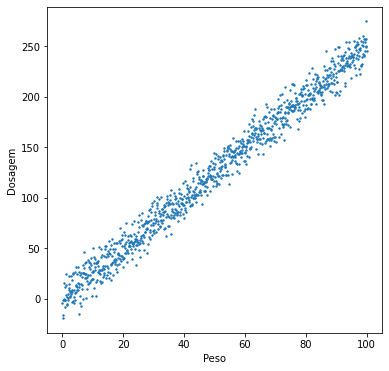

b0: 0.23575478778649028 b1: 2.5037857337131832


Text(0, 0.5, 'Dosagem')

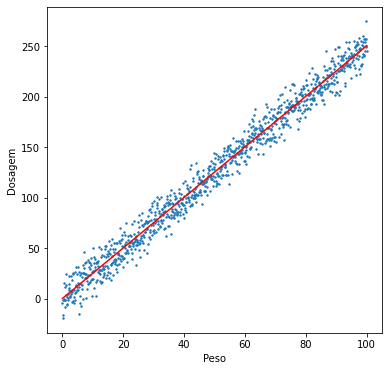

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/alissonSCA/dataset/master/dt_lin.csv', sep=',')
df.head()

x = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

print(x.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel('Peso')
plt.ylabel('Dosagem')

plt.show()

def correlation(x, y):    
    x1 = (x - np.mean(x))
    y1 = (y - np.mean(y))
    
    num = np.sum(x1*y1)
    div = np.sqrt(np.sum(x1**2) * np.sum(y1**2))
    return num/div

class MyLinearRegression():
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0
    
    def fit(self, x, y):
        self.b1 = correlation(x, y) * np.std(y) / np.std(x)
        self.b0 = np.mean(y) - (self.b1 * np.mean(x))
    
    def predict(self, x):
        return self.b0 + self.b1*x

reg = MyLinearRegression()
reg.fit(x, y)

print('b0: {} b1: {}'.format(reg.b0, reg.b1))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s = 2)
plt.plot(x, reg.predict(x), c = 'red')
plt.xlabel('Peso')
plt.ylabel('Dosagem')
